# Is Fandango Still Inflating Movie Ratings?

## Executive Summary
In 2015, Walt Hickey published a FiveThirtyEgith article demonstrating that Fandango's movie ratings were biased towards higher-than-normal scores. Based on analysis of Fandango's ratings in 2016, there has not been a significant shift in how Fandango rates films.

A conversion chart between Fandango's score system and a less-biased 5-star scale is provided near the end of this document.

## Introduction
In 2015, an article titled ["Be Suspicious Of Online Movie Ratings, Especially Fandango's"](https://fivethirtyeight.com/features/fandango-movies-ratings/) was published on the data science website [FiveThirtyEight](https://fivethirtyeight.com) by [Walt Hickey](http://walthickey.com/). This article was an exposé of online movie ratings manipulation, focusing on the worst identified culprit, [Fandango](fandango.com). 
Since the article was published, Fandango has maintained that *errors* in their rating algorithms have been corrected. This project seeks to evaluate if those changes have indeed been made.

## Front Matter
### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pre_article_ratings = pd.read_csv('./Data/fandango_score_comparison.csv')
post_article_ratings = pd.read_csv('./Data/movie_ratings_16_17.csv')

### Functions and Global Variables

In [2]:
title_font = {'fontname':'Calibri', 'fontsize':20, 'weight':'bold'}
axis_label_font = {'fontname': 'Calibri', 'fontsize':14, 'weight':'bold'}

In [3]:
def format_plot(x_label: str = '', y_label: str = '', title: str = '',
                x_lims: tuple = (0, 0), y_lims: tuple = (0, 0)):
    '''General formatting function for plots within this notebook
    
    Arguments:
        x_label = the x-axis label
        y_label = the y-axis label
        title = the title to be shown on the graph
        x_lims = the limits of the x-axis
        y_lims = the limits of the y-axis
    '''
    plt.xlabel(x_label, fontdict = axis_label_font)
    plt.ylabel(y_label, fontdict = axis_label_font)
    plt.title(title, fontdict = title_font)
    plt.xlim(x_lims[0], x_lims[1])
    plt.ylim(y_lims[0], y_lims[1])
    plt.legend()

### Data Description
I will work with two datasets in this project:
1. *Fandango* ratings collected before Hickey's article was published. 
2. Ratings collected after the article was posted. These data include *Fandango* movie ratings in addition to ratings collected from other aggregator sites: *Fandango*, *Rotten Tomatoes* (both the critic driven Tomatometer and the audience ratings), *IMDB*, and *Metacritic*

These datasets focus on "popular" movies. Popular is a non-specific metric, and it is possible that each of these datasets utilize different filters to identify popular movies. For the purpose of this analysis, I chose to utilize all entries in both datasets.

### Data Cleaning
The primary goal of this project is to investigate if *Fandango's* rating system was significantly altered following the posting of Hickey's article. For this reason, the time of a movie's release is important. 

Hickey's article was posted in October 2015. He utilized data collected on movies released that calendar year. Our second dataset contains release **years**, but not release **months**. To restrict our analysis of the second dataset to *post article* releases, I chose to use only movies that were released in 2016 and later.

In [4]:
ratings2015 = pre_article_ratings
ratings2016 = post_article_ratings.loc[post_article_ratings['year'] >= 2016, :]

## Analysis
### Reviewing Hickey's Results
In Hickey's article, he argued that Fandango, unlike other movie rating aggregators, has an incentive to keep movie ratings high. In addition to providing movie ratings, Fandango *sells* tickets. Poorly rated movies are likely to sell fewer tickets, so Fandango benefits from inflating ratings.

One of Hickey's key findings was that Fandango reported the *actual* aggregate rating of a movie in its `HTML` code. He observed that the ratings present in the `HTML` code (*Raw Stars*) were lower than the ratings present on the user-facing webpage (*Displayed Stars*).

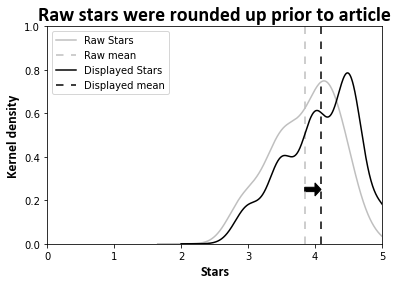

In [11]:
raw_mean = ratings2015['Fandango_Ratingvalue'].mean()
displayed_mean = ratings2015['Fandango_Stars'].mean()

ratings2015['Fandango_Ratingvalue'].plot.kde(label = 'Raw Stars',
                                             color = '0.75')
plt.axvline(x = raw_mean, dashes = (5, 5), color = '0.75', label = 'Raw mean')

ratings2015['Fandango_Stars'].plot.kde(label = 'Displayed Stars',
                                       color = '0')
plt.axvline(x = displayed_mean, dashes = (5, 5), color = '0',
            label = 'Displayed mean')

plt.arrow(x = raw_mean, y = 0.25, dx = displayed_mean - raw_mean, dy = 0,
          width = 0.02, length_includes_head = True, color = '0')
format_plot(x_label = 'Stars', y_label = 'Kernel density',
            title = 'Raw stars were rounded up prior to article', 
            x_lims = (0, 5), y_lims = (0, 1))
plt.show()

Reproducing this finding is a nice validation of our dataset, but not the goal of this project.

### Comparing Fandango's Pre and Post Article Ratings
I set out to determine if Fandango has *significantly* altered its rating system since Hickey's article was published. I define significantly as:
* Reduction in mean score
* Assigning scores of 2 or less to > 5% of movies

These metrics would demonstrate that Fandango has chosen to display accurate representations of some films that are collectively viewed as awful without forcing them to rate many films poorly.

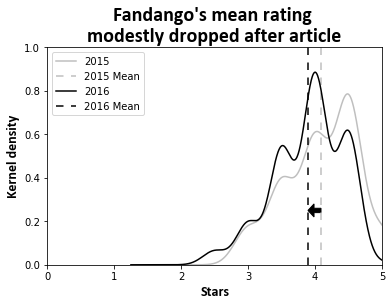

In [13]:
fandango2015_mean = ratings2015['Fandango_Stars'].mean()
fandango2016_mean = ratings2016['fandango'].mean()

ratings2015['Fandango_Stars'].plot.kde(label = '2015', color = '0.75')
plt.axvline(x = fandango2015_mean, dashes = (5, 5), color = '0.75',
            label = '2015 Mean')

ratings2016['fandango'].plot.kde(label = '2016', color = '0')
plt.axvline(x = fandango2016_mean, dashes = (5, 5), color = '0',
            label = '2016 Mean')

plt.arrow(x = fandango2015_mean, y = .25,
          dx = fandango2016_mean - fandango2015_mean, dy = 0,
          width = 0.02, color = '0', length_includes_head = True)
format_plot(x_label = 'Stars', y_label = 'Kernel density',
            title = 'Fandango\'s mean rating \nmodestly dropped after article', x_lims = (0, 5), y_lims = (0, 1))
plt.show()

Based on the data above, I determined that Fandango did decrease its mean score, but it still did not assign scores of 2 stars or fewer to any popular movies.
Based on this finding, **Fandango has NOT significantly altered its rating system since Hickey's article.**

### Comparing Fandango's 2016 ratings to other aggregator sites
The data show that Fandango has not significantly changed its rating system since Hickey's article was published. Yet this finding alone does not show that Fandango's rating system is biased towards high scores. To demonstrate this bias, I compared Fandango's 2016 ratings to ratings scraped from other rating aggregators including:
* IMDB
* Metacritic
* Rotten Tomatoes (critic score)
* Rotten Tomatoes (audience score)

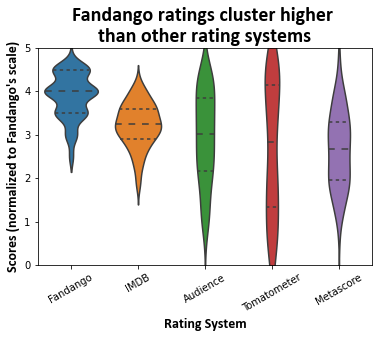

In [14]:
rating_system_names = ['Fandango', 'IMDB', 'Audience', 'Tomatometer',       
                       'Metascore']
                       
dists_to_plot_2016 = ratings2016[['fandango', 'n_imdb', 'n_audience', 
                         'n_tmeter', 'n_metascore']]
dists_to_plot_2016.columns = [rating_system_names]

sns.violinplot(data = dists_to_plot_2016, inner = 'quartiles')
plt.xticks(ticks = range(0, 5), labels = rating_system_names, rotation = 30)
plt.title('Fandango ratings cluster higher \nthan other rating systems',
          fontdict = title_font)
plt.xlabel('Rating System', fontdict = axis_label_font)
plt.ylabel('Scores (normalized to Fandango\'s scale)',
           fontdict = axis_label_font)
plt.ylim(0, 5);

The violin plot above shows that Fandango's movie ratings are consistently higher than any of the other rating systems evaluated. The most striking aspect of this is the morphology of the *Audience*, *Tomatometer*, and *Metascore* score distributions.
1. **Audience and Metascore**: These two distributions are center heavy, indicating that the majority of movies are scored as "average" (~3 stars). Towards high and low ratings, these distributions taper off.
2. **Tomatometer**: This bimodal distribution has higher densities at ~4 and ~1 stars and relatively low density at ~3 stars.

*Audience* and *Metascore's* central-heavy and tapering distribution would be most effective at identifying truly exceptional movies (good or bad). *Tomatometer's* approach appears to push ratings towards 'exceptional'(fresh) or 'awful'(rotten). The bimodal distribution indicates that it is more likely to label a movie as "good" or "bad" than "average".

### Normalizing All Metrics to a 5 point scale
In the violin plot above, both *Fandango* and *IMDB* have distributions skewed towards higher scores. To force these two rating systems to occupy the entire 0-5 star range, we can renormalize their scores against 5.

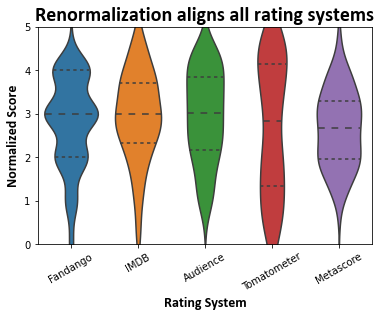

In [15]:
fandango_min = dists_to_plot_2016['Fandango'].min()
fandango_max = dists_to_plot_2016['Fandango'].max()
fandango_range = fandango_max - fandango_min
fandango_renorm = ((dists_to_plot_2016['Fandango'] - fandango_min)\
                     / fandango_range) * 5
                     
imdb_min = dists_to_plot_2016['IMDB'].min()
imdb_max = dists_to_plot_2016['IMDB'].max()
imdb_range = imdb_max - imdb_min
imdb_renorm = ((dists_to_plot_2016['IMDB'] - imdb_min)\
                     / imdb_range) * 5

combined_dists = pd.concat([fandango_renorm, imdb_renorm, 
                            dists_to_plot_2016[['Audience', 'Tomatometer', 'Metascore']]], axis = 1)
plt.ylim(0, 5)

sns.violinplot(data = combined_dists, inner = 'quartiles')
plt.title('Renormalization aligns all rating systems',
          **title_font)
plt.xlabel('Rating System', fontdict = axis_label_font)
plt.ylabel('Normalized Score', fontdict = axis_label_font)
plt.xticks(ticks = range(0, 5), labels = rating_system_names, rotation = 30)
plt.ylim(0, 5);

When renormalized, the *Fandango* and *IMDB* plots begin to resemble the 5-star scale normalized distributions of *Audience*, *Tomatometer*, and *Metascore*. Based on this graph, I believe we can create a reasonable conversion table between Fandango's displayed stars and a 5-star scale that is in line with other rating systems.

In [10]:
convert_table = pd.DataFrame(columns = ['Fandango Stars',
                                               'Corrected Stars'])
convert_table['Fandango Stars'] = pd.Series(range(4, 11, 1)) * 0.5
convert_table['Corrected Stars'] = ((convert_table['Fandango Stars'] - 2) / 3)\
                                         * 5
convert_table['Corrected Stars'] = convert_table['Corrected Stars'].round(1)
from IPython.display import HTML
HTML(convert_table.to_html(index = False))

Fandango Stars,Corrected Stars
2.0,0.0
2.5,0.8
3.0,1.7
3.5,2.5
4.0,3.3
4.5,4.2
5.0,5.0


## Conclusions
Fandango has a perverse incentive to provide inflated ratings to films. Higher rated films are more likely to sell tickets, which is how Fandango makes money. Although Walk Hickey published an article exposing Fandango's inflated ratings in 2015, this analysis of 2016 ratings data does not indicate that Fandango has significantly altered its rating system.


**Rather than ignore Fandango's ratings altogether, I believe that a simple conversion from Fandango's rosy rating system to a true 5-point scale allows more objective interpretation of a movie's quality.**